In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import nn

from loaders import Mnist
mnist = Mnist()

In [59]:
print(torch.__version__)

1.0.0


In [99]:
state = torch.load('states/aae_disc_spiral_final_2.tar')
results = state['results']
print(len(results['x_rec']))

109


In [96]:
state = torch.load('states/aae_disc_flower_final.tar')
results = state['results']
print(len(results['x_rec']))

139


In [38]:
print(results['z_grad'])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



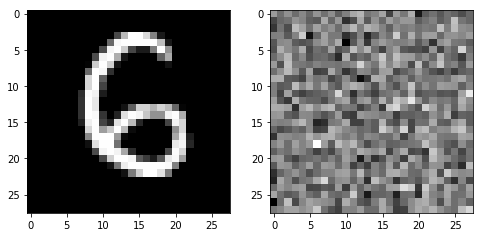

In [100]:
#rec
epoch = -1
n = 4

fig = plt.figure(figsize=(8,12))

ax = fig.add_subplot(121)
ax.imshow(mnist.valid.x[n].reshape(28,28), cmap='gray')

ax = fig.add_subplot(122)
ax.imshow(results['x_rec'][epoch][n].reshape(28,28), cmap='gray')

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

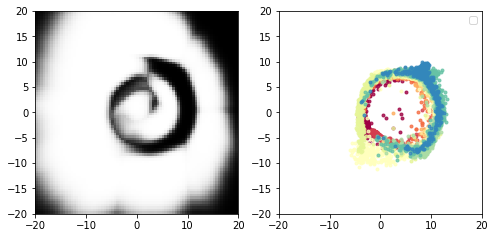

In [101]:
#z space
epoch = -1

fig = plt.figure(figsize=(8,12))

ax = fig.add_subplot(121)
ax.imshow(results['z_hmap'][epoch].reshape(80,80), cmap='gray',
          vmin=0, vmax=1, origin='lower', extent=[-20,20,-20,20])

ax = fig.add_subplot(122)
color = mnist.valid.y
cmap = matplotlib.cm.get_cmap('Spectral')
for i in range(10):
    X, Y = results['z_space'][epoch].T
    rgba = cmap(i/10)
    ax.scatter(X[color==i], Y[color==i], c=rgba, alpha=0.8, marker='.')
#     ax.scatter(X[color==i], Y[color==i], c=rgba, label=i, alpha=0.8)
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_aspect('equal')
ax.legend()

plt.show()

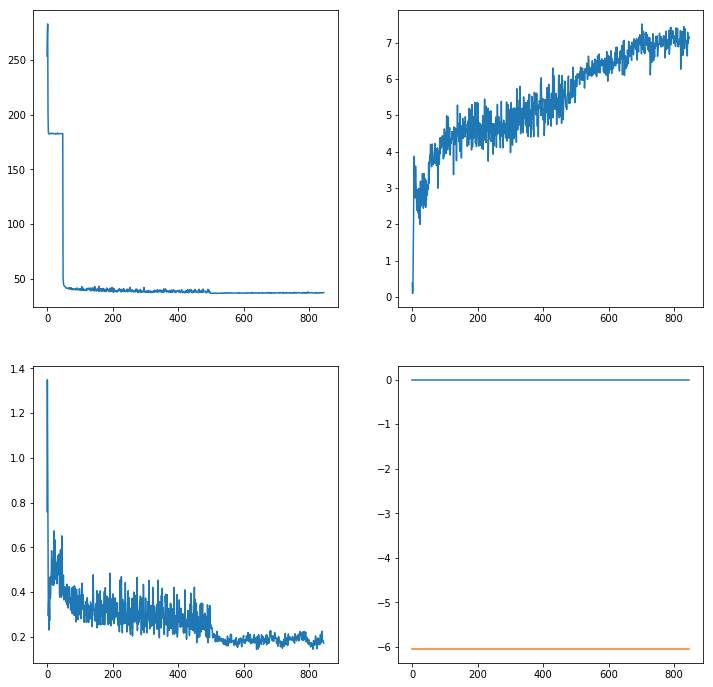

In [70]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(221)
ax.plot(results['rec'])

ax = fig.add_subplot(222)
ax.plot(results['gen'])

ax = fig.add_subplot(223)
ax.plot(results['adv'])

ax = fig.add_subplot(224)
ax.plot(results['llh'])
ax.plot([-6.0567528 for _ in range(len(results['llh']))])